Code for Analysis

In [96]:
# Import Dependencies and Load the Data
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from matplotlib.ticker import FuncFormatter


health_data = pd.read_csv("2019_Health_Data.csv")

In [97]:
# Keep the age and mental helath columns for analysis
age_data=health_data[['What is your age?','Do you *currently* have a mental health disorder?']]

# Renaming the columns
age_data=age_data.rename(columns={'What is your age?': 'Age', 'Do you *currently* have a mental health disorder?':'Mental Health Disorder' })
age_data

,Age,Mental Health Disorder
0,25,Don't Know
1,51,Possibly
2,27,No
3,37,No
4,46,No
...,...,...
347,27,Possibly
348,48,No
349,50,No
350,30,Possibly


In [98]:
# Cleaning up the useless responses
valid_responses=['Yes','No']
age_data= age_data[age_data['Mental Health Disorder'].isin(valid_responses)]
age_data


,Age,Mental Health Disorder
2,27,No
3,37,No
4,46,No
5,36,Yes
6,39,Yes
...,...,...
345,26,No
346,31,No
348,48,No
349,50,No


In [99]:
# Putting the ages into bins
age_data['Age'] = age_data['Age'].astype('str')
age_data['Age'] = age_data['Age'].str.strip() 
age_data['Age'] = pd.to_numeric(age_data['Age'], errors='coerce')

bins = [18,26,32,40,100]
labels = ['Group 1', 'Group 2', 'Group 3','Group 4']
age_data['Age'] = pd.cut(age_data['Age'], bins=bins, labels= labels)
total_participants = len(age_data)


C:\Users\ahanc\AppData\Local\Temp\ipykernel_11560\4187924030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['Age'] = age_data['Age'].astype('str')
C:\Users\ahanc\AppData\Local\Temp\ipykernel_11560\4187924030.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['Age'] = age_data['Age'].str.strip()
C:\Users\ahanc\AppData\Local\Temp\ipykernel_11560\4187924030.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [100]:
# Taking a count for every bin
group_1= age_data[(age_data['Mental Health Disorder']=='Yes') & (age_data['Age']=='Group 1')]
group_1_count = len(group_1)

group_2 = age_data[(age_data['Mental Health Disorder']=='Yes') & (age_data['Age']=='Group 2')]
group_2_count = len(group_2)
group_2_count

group_3 = age_data[(age_data['Mental Health Disorder']=='Yes') & (age_data['Age']=='Group 3')]
group_3_count = len(group_3)
group_3_count

group_4 = age_data[(age_data['Mental Health Disorder']=='Yes') & (age_data['Age']=='Group 4')]
group_4_count = len(group_4)
group_4_count



39

In [101]:
# Calculating the percentages for each bin
group_1_total_count = len(age_data[(age_data['Age']=='Group 1')])
group_1_percent = round(group_1_count/group_1_total_count*100,2)
group_1_no = group_1_total_count-group_1_count

group_2_total_count = len(age_data[(age_data['Age']=='Group 2')])
group_2_percent = round(group_2_count/group_2_total_count*100,2)
group_2_no = group_2_total_count-group_2_count

group_3_total_count = len(age_data[(age_data['Age']=='Group 3')])
group_3_percent = round(group_3_count/group_3_total_count*100,2)
group_3_no = group_3_total_count-group_3_count

group_4_total_count = len(age_data[(age_data['Age']=='Group 4')])
group_4_percent = round(group_4_count/group_4_total_count*100,2)
group_4_no = group_4_total_count-group_4_count


In [106]:
# Combining the percentages into a single dataframe
data = { 'Labels': ['Group 1 (Age 18-25)', 'Group 2 (Age 26-31)','Group 3 (Age 32-39)','Group 4 (Age 40+)'],
        'Yes Count': [group_1_count, group_2_count, group_3_count, group_4_count],
        'No Count': [group_1_no, group_2_no, group_3_no, group_4_no],
        'Percent Yes': [group_1_percent, group_2_percent, group_3_percent, group_4_percent]       
}

data = pd.DataFrame(data)
data

,Labels,Yes Count,No Count,Percent Yes
0,Group 1 (Age 18-25),23,10,69.70
1,Group 2 (Age 26-31),37,26,58.73
2,Group 3 (Age 32-39),48,34,58.54
3,Group 4 (Age 40+),39,33,54.17


(0.0, 100.0)

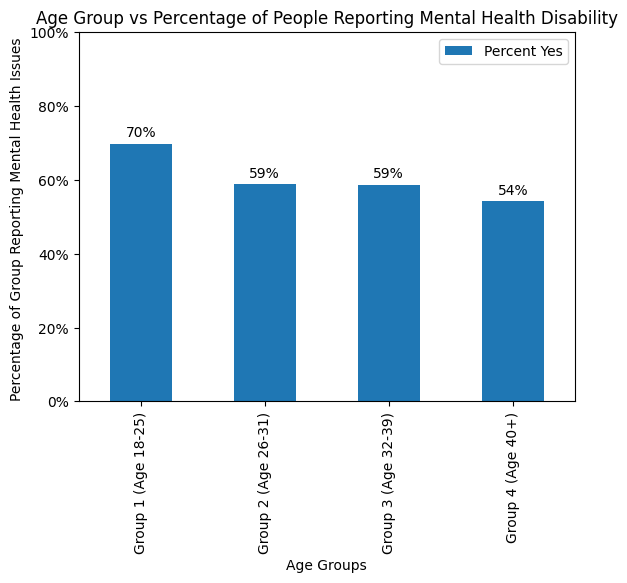

In [113]:
# Plotting the age data into a bar chart
age_bar_plot = data.plot(kind='bar', x='Labels', y=['Percent Yes'])

age_bar_plot.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0f}%'))


for container in age_bar_plot.containers:
    age_bar_plot.bar_label(container, fmt='%.0f%%', padding=3) 

plt.title('Age Group vs Percentage of People Reporting Mental Health Disability')
plt.xlabel('Age Groups')
plt.ylabel('Percentage of Group Reporting Mental Health Issues ')
plt.ylim(0,100)


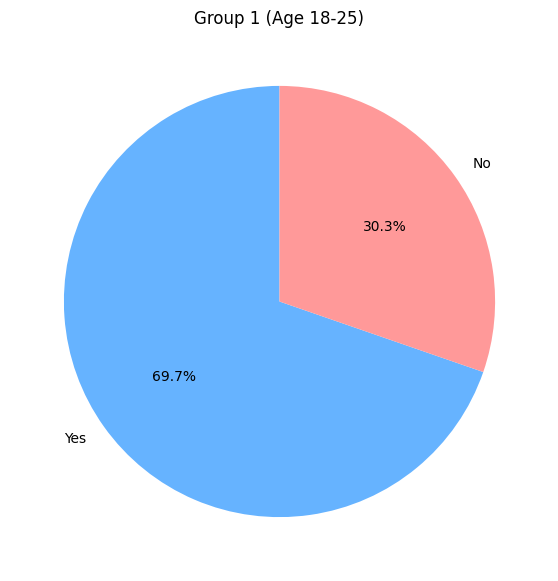

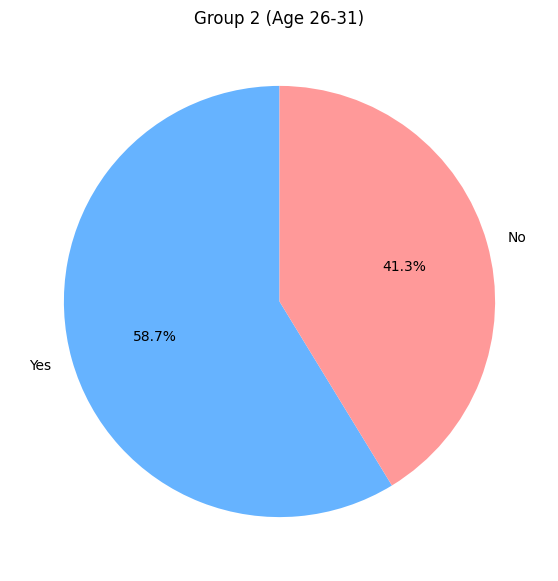

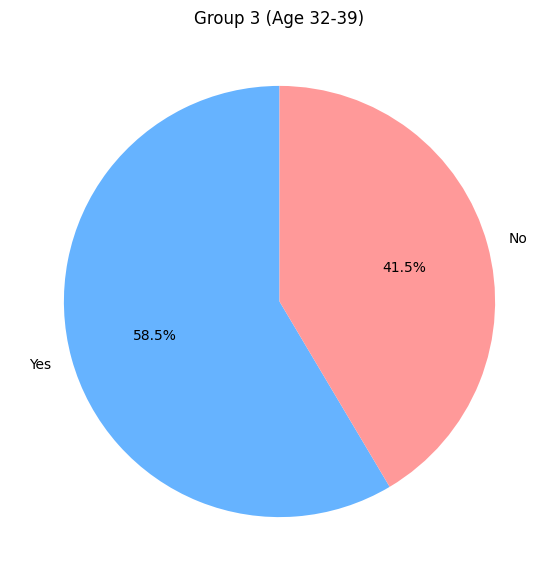

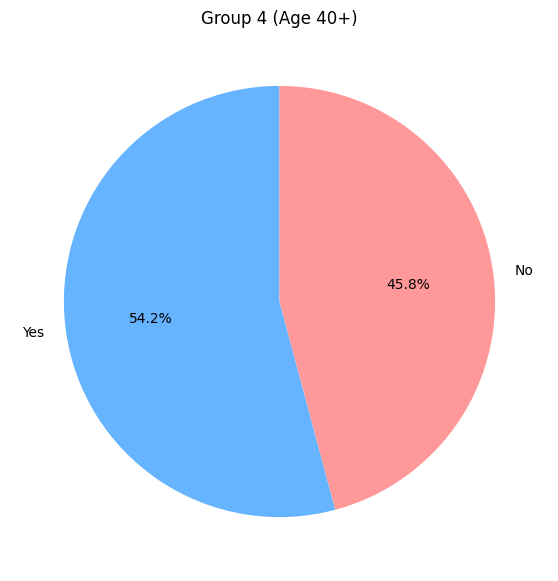

In [ ]:
# Pie chart

for i in range(len(data)):
    group_name = data['Labels'][i]
    yes_count = data['Yes Count'][i]
    no_count = data['No Count'][i]
    
    values = [yes_count, no_count]
    labels = ['Yes', 'No']
    
    plt.figure(figsize=(7, 7))
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
    plt.title(group_name)
    plt.show()
